# Initialization

In [1]:
STATE = 34

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Data Statistics

In [4]:
df_train.head()

,id,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,reservation_status
0,0,Resort Hotel,312,2017,March,10,5,2,5,2,...,A,0,No Deposit,298.0,NaN,0,Transient-Party,56.0,0,0
1,1,City Hotel,2,2015,December,51,18,0,2,2,...,D,1,No Deposit,9.0,NaN,0,Transient,97.0,0,1
2,2,City Hotel,41,2016,March,14,31,0,3,2,...,A,0,No Deposit,9.0,NaN,0,Transient,117.9,0,1
3,3,Resort Hotel,228,2016,August,36,29,2,5,2,...,D,0,No Deposit,175.0,NaN,0,Transient,86.4,0,1
4,4,City Hotel,128,2017,May,19,13,0,1,3,...,A,0,No Deposit,9.0,NaN,0,Transient,144.0,0,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75636 entries, 0 to 75635
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75636 non-null  int64  
 1   hotel                           75636 non-null  object 
 2   lead_time                       75636 non-null  int64  
 3   arrival_date_year               75636 non-null  int64  
 4   arrival_date_month              75636 non-null  object 
 5   arrival_date_week_number        75636 non-null  int64  
 6   arrival_date_day_of_month       75636 non-null  int64  
 7   stays_in_weekend_nights         75636 non-null  int64  
 8   stays_in_week_nights            75636 non-null  int64  
 9   adults                          75636 non-null  int64  
 10  children                        75633 non-null  float64
 11  babies                          75636 non-null  int64  
 12  meal                            

In [6]:
df_train.describe()

,id,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,reservation_status
count,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75633.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,65369.000000,4287.000000,75636.000000,75636.000000,75636.000000,75636.000000
mean,37817.500000,104.216841,2016.158351,27.191509,15.782921,0.929531,2.506650,1.856946,0.103764,0.007563,0.031361,0.086348,0.139999,0.221046,86.723172,189.899697,2.316146,101.932624,0.062602,0.636046
std,21834.376817,106.797344,0.706349,13.618039,8.770960,1.002940,1.923848,0.564948,0.396923,0.093249,0.174292,0.838637,1.525138,0.648692,110.755189,132.540272,17.523782,51.928827,0.245124,0.481139
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,18908.750000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.000000,0.000000,0.000000
50%,37817.500000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,95.000000,0.000000,1.000000
75%,56726.250000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,274.000000,0.000000,126.000000,0.000000,1.000000
max,75635.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,9.000000,1.000000,26.000000,72.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,1.000000


In [7]:
df_train['reservation_status'].value_counts()

reservation_status
1    48108
0    27528
Name: count, dtype: int64

## NA Entries

In [8]:
df_train.isna().sum()

id                                    0
hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             325
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             10267
company                           71349


In [9]:
df_train.nunique()

id                                75636
hotel                                 2
lead_time                           474
arrival_date_year                     3
arrival_date_month                   12
arrival_date_week_number             53
arrival_date_day_of_month            31
stays_in_weekend_nights              17
stays_in_week_nights                 34
adults                               11
children                              4
babies                                4
meal                                  5
country                             164
market_segment                        8
distribution_channel                  5
is_repeated_guest                     2
previous_cancellations               15
previous_bookings_not_canceled       61
reserved_room_type                   10
assigned_room_type                   11
booking_changes                      20
deposit_type                          3
agent                               310
company                             318


## Data Skew

In [10]:
str_train = df_train.copy()

# Exploratory Data Analysis

## Hotel Distribution

hotel
City Hotel      50262
Resort Hotel    25374
Name: count, dtype: int64


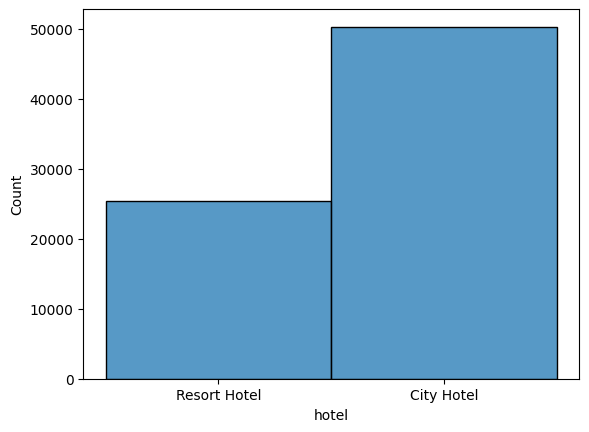

In [13]:
sns.histplot(data=df_train['hotel'])
print(df_train['hotel'].value_counts())

## Reservation Status Distribution

reservation_status
1    48108
0    27528
Name: count, dtype: int64


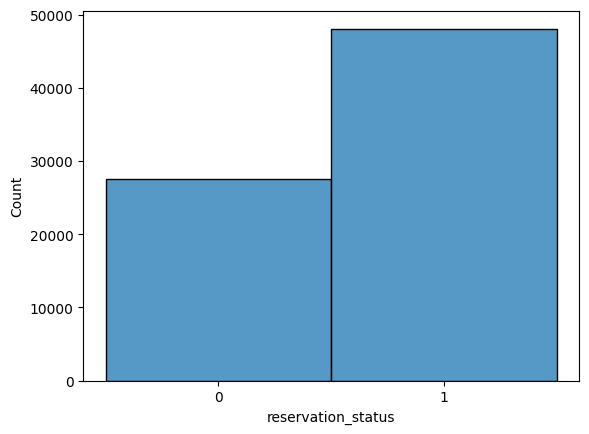

In [14]:
str_train.drop("id",axis=1,inplace=True)
str_train['reservation_status'] = str_train['reservation_status'].astype("string")
sns.histplot(data=str_train,x="reservation_status",bins=2,discrete=True)
print(df_train['reservation_status'].value_counts())

### Respect to Lead Time

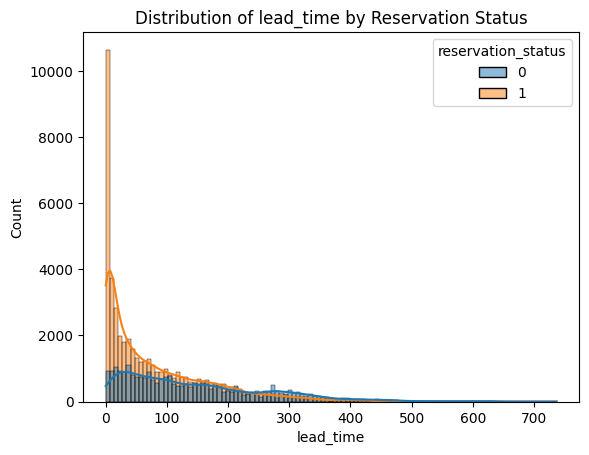

In [15]:
col = 'lead_time'
plt.figure()
sns.histplot(data=str_train, x=col,hue='reservation_status',kde=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.show()

In [16]:
str_train['lead_time'].value_counts()

lead_time
0      3966
1      2201
2      1284
3      1132
4      1083
       ... 
399       1
458       1
387       1
532       1
375       1
Name: count, Length: 474, dtype: int64

a binning of 0,200, and max can be done

### Respect to Arrival Year

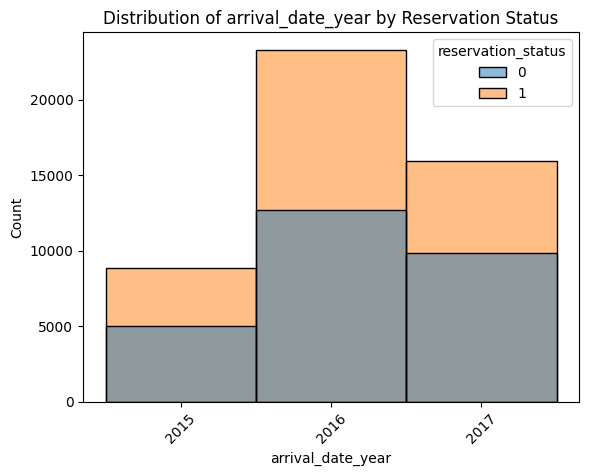

In [17]:
col = 'arrival_date_year'
year_order = [2015, 2016, 2017]
str_train[col] = pd.Categorical(str_train[col], categories=year_order, ordered=True)
plt.figure()
plt.xticks(ticks=year_order,rotation=45)
sns.histplot(data=str_train, x=col,hue='reservation_status',bins=3,discrete=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.show()

#### Success rates by year

In [18]:
for i in year_order:
    print(f'{i} reservation distribution : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()}')
    print(f'{i} success rate : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()[0]/str_train[str_train["arrival_date_year"]==i].shape[0] *100:.2f}%')

2015 reservation distribution : reservation_status
1    8836
0    4992
Name: count, dtype: Int64
2015 success rate : 63.90%
2016 reservation distribution : reservation_status
1    23303
0    12700
Name: count, dtype: Int64
2016 success rate : 64.73%
2017 reservation distribution : reservation_status
1    15969
0     9836
Name: count, dtype: Int64
2017 success rate : 61.88%


C:\Users\Warge\AppData\Local\Temp\ipykernel_21508\3331307246.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{i} success rate : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()[0]/str_train[str_train["arrival_date_year"]==i].shape[0] *100:.2f}%')
C:\Users\Warge\AppData\Local\Temp\ipykernel_21508\3331307246.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{i} success rate : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()[0]/str_train[str_train["arrival_date_year"]==i].shape[0] *100:.2f}%')
C:\Users\Warge\AppData\Local\Temp\ipyk

### Respect to Arrival Month

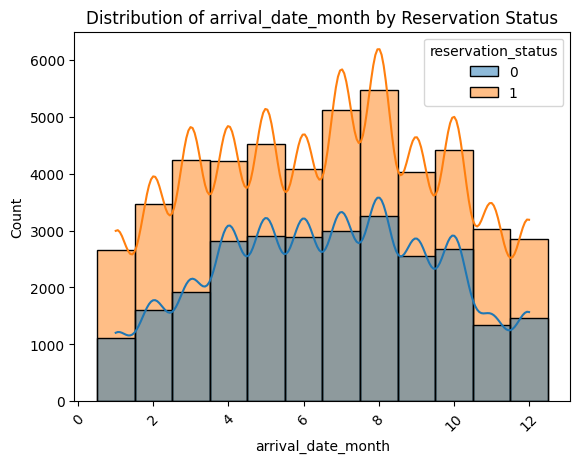

In [19]:
col = 'arrival_date_month'
month_to_number = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
  }
str_train[col] = str_train[col].map(month_to_number)

# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status', kde=True, bins=12)
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Arrival Week

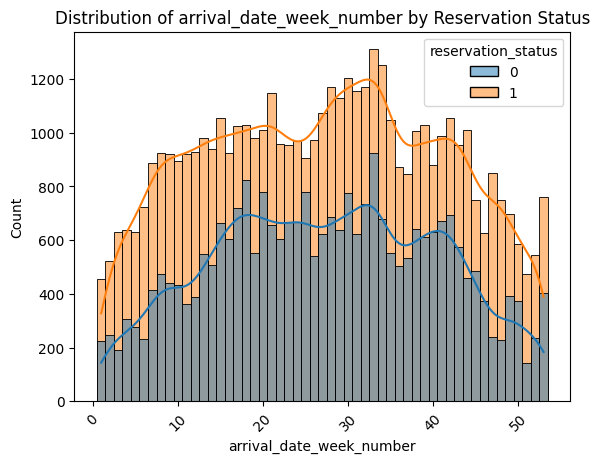

In [20]:
col = 'arrival_date_week_number'
week_order = [i for i in range(1,54)]
str_train[col] = pd.Categorical(str_train[col], categories=week_order, ordered=True)

# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status', kde=True, bins=len(week_order))
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Arrival Date

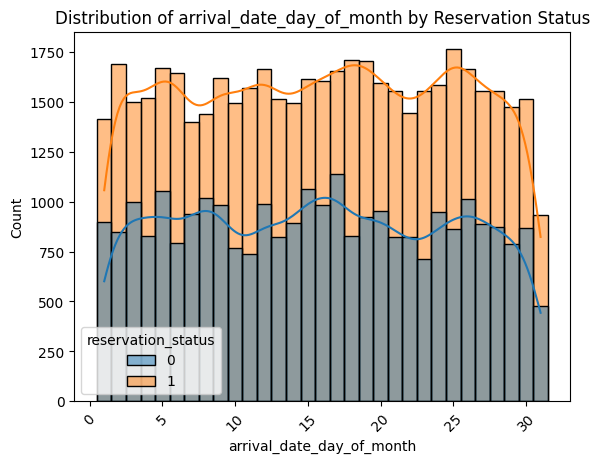

In [21]:
col = 'arrival_date_day_of_month'
date_order = [i for i in range(1,32)]
str_train[col] = pd.Categorical(str_train[col], categories=date_order, ordered=True)

# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status', kde=True, bins=len(date_order))
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Weekend Nights

stays_in_weekend_nights
0     32914
2     21154
1     19369
4      1177
3       795
6       100
5        52
8        43
7        10
9         7
12        5
10        3
16        2
13        2
14        1
18        1
19        1
Name: count, dtype: int64


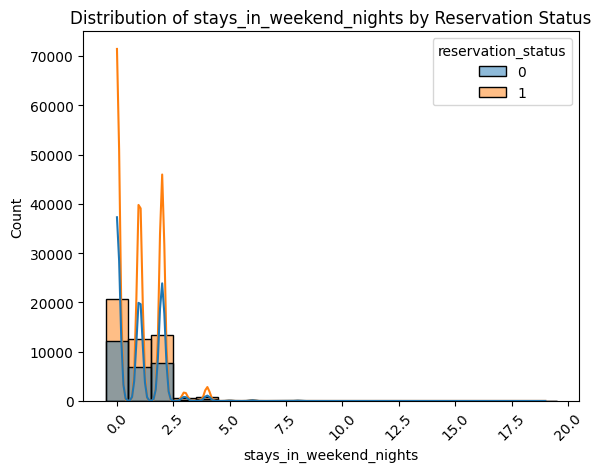

In [22]:
col = 'stays_in_weekend_nights'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status', kde=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Outlier Values

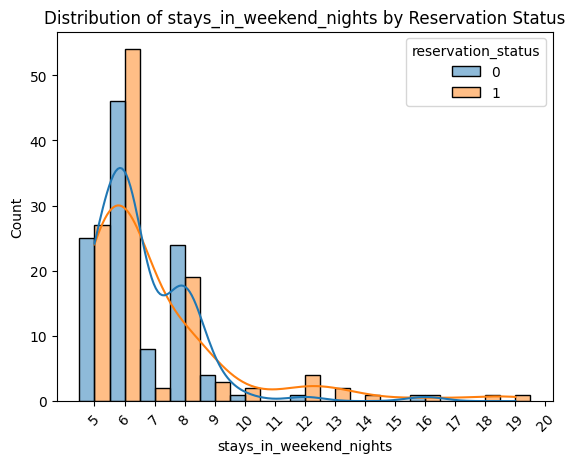

In [23]:
col = 'stays_in_weekend_nights'
many_weekend_nights = str_train[str_train[col] > 4]
# Create the histogram plot
plt.figure()
sns.histplot(data=many_weekend_nights, x=col, discrete=True, hue='reservation_status',multiple="dodge", kde=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(ticks=[i for i in range(5,21)],rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Weekday Nights

stays_in_week_nights
2     21247
1     19244
3     14134
5      7034
4      6110
0      4781
6       949
10      677
7       647
8       419
9       139
15       54
11       34
19       32
20       29
12       24
14       19
13       16
21       11
16        9
22        5
30        4
18        3
24        3
25        2
17        2
42        1
40        1
41        1
32        1
33        1
50        1
26        1
34        1
Name: count, dtype: int64


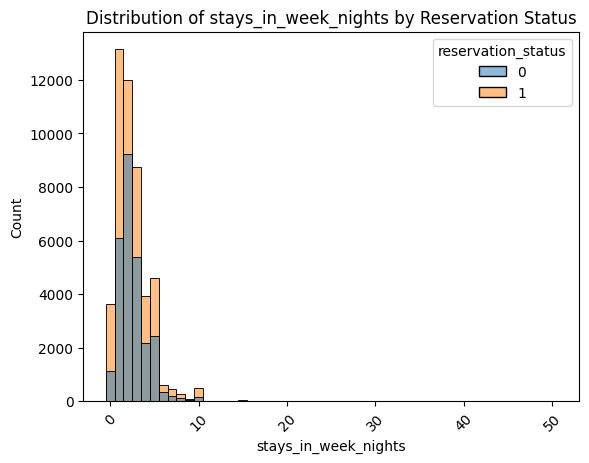

In [24]:
col = 'stays_in_week_nights'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Outlier Values

reservation_status
1    2023
0    1063
Name: count, dtype: Int64


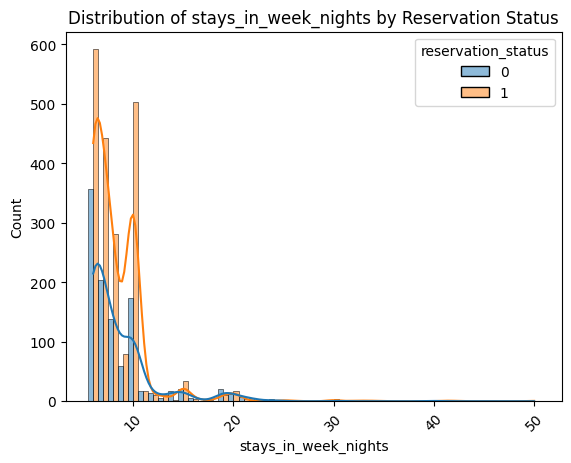

In [25]:
col = 'stays_in_week_nights'
many_week_nights = str_train[str_train[col] > 5]
many_week_nights=many_week_nights.sort_values(by="reservation_status", ascending=True)
print(many_week_nights['reservation_status'].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=many_week_nights, x=col, discrete=True, hue='reservation_status',multiple="dodge", kde=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Adults

adults
2     56716
1     14607
3      4008
0       252
4        43
26        2
27        2
20        2
5         2
6         1
55        1
Name: count, dtype: int64


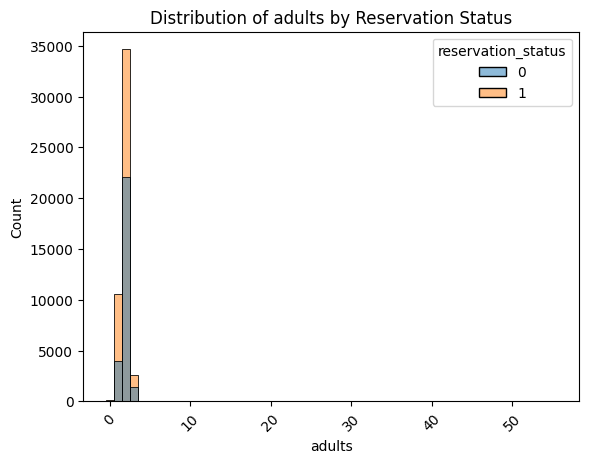

In [26]:
col = 'adults'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Outlier Values

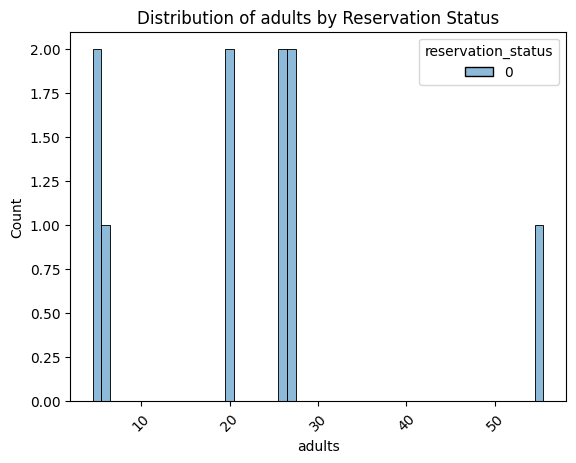

In [27]:
col = 'adults'
many_adults = str_train[str_train[col] >= 5]
# Create the histogram plot
plt.figure()
sns.histplot(data=many_adults, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Children

children
0.0    70179
1.0     3107
2.0     2300
3.0       47
Name: count, dtype: int64


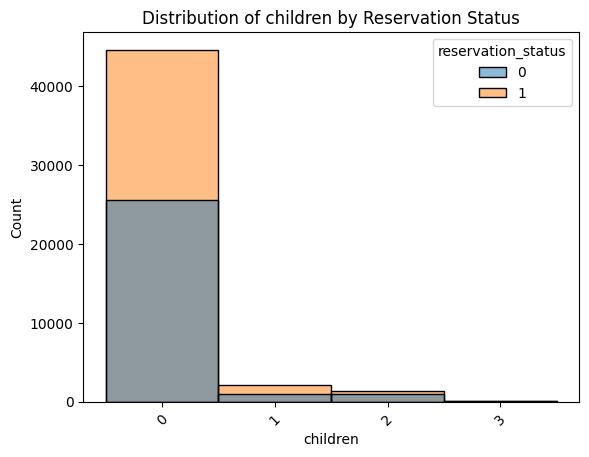

In [28]:
col = 'children'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(ticks=[0,1,2,3],rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Have Children

1 child(s) reservation distribution : reservation_status
1    2106
0    1001
Name: count, dtype: Int64
1 child(s) success rate : 67.78%
2 child(s) reservation distribution : reservation_status
1    1326
0     974
Name: count, dtype: Int64
2 child(s) success rate : 57.65%
3 child(s) reservation distribution : reservation_status
1    33
0    14
Name: count, dtype: Int64
3 child(s) success rate : 70.21%


C:\Users\Warge\AppData\Local\Temp\ipykernel_21508\1347835897.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{i} child(s) success rate : {have_children[have_children["children"]==i]["reservation_status"].value_counts()[0]/have_children[have_children["children"]==i].shape[0] *100:.2f}%')
C:\Users\Warge\AppData\Local\Temp\ipykernel_21508\1347835897.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{i} child(s) success rate : {have_children[have_children["children"]==i]["reservation_status"].value_counts()[0]/have_children[have_children["children"]==i].shape[0] *100:.2f}%')
C:\Users\Warge\AppData\L

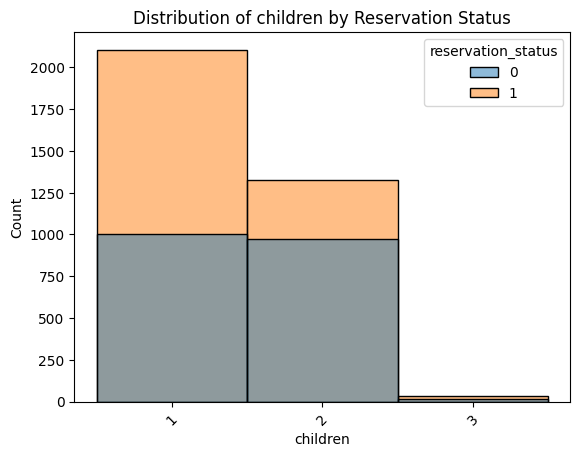

In [29]:
col = 'children'
have_children = str_train[str_train[col] > 0]
have_children = have_children.sort_values(by="reservation_status", ascending=True)
for i in range(1,4):
    print(f'{i} child(s) reservation distribution : {have_children[have_children["children"]==i]["reservation_status"].value_counts()}')
    print(f'{i} child(s) success rate : {have_children[have_children["children"]==i]["reservation_status"].value_counts()[0]/have_children[have_children["children"]==i].shape[0] *100:.2f}%')
# Create the histogram plot
plt.figure()
sns.histplot(data=have_children, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(ticks=[1,2,3],rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Babies

babies
0    75081
1      545
2        9
9        1
Name: count, dtype: int64


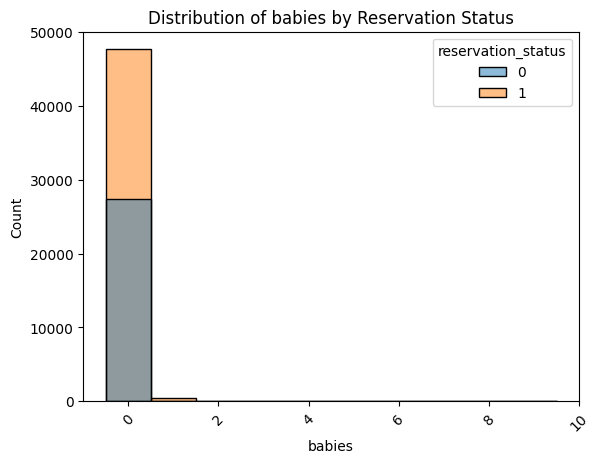

In [30]:
col = 'babies'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Meal

meal
BB           58566
HB            9199
SC            6628
Undefined      746
FB             497
Name: count, dtype: int64


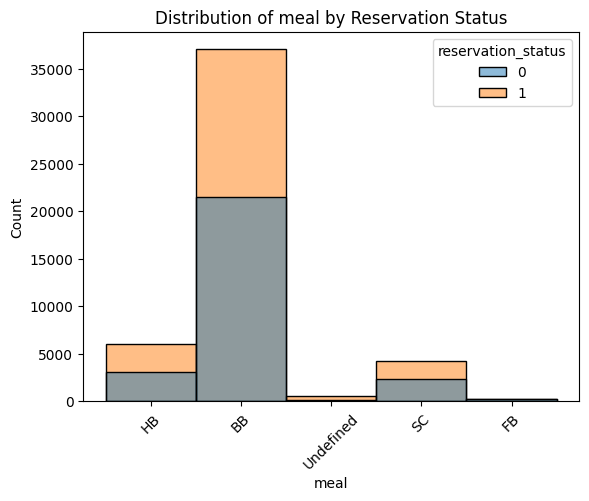

In [31]:
col = 'meal'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Country

75311
country
PRT    30643
GBR     7690
FRA     6698
ESP     5384
DEU     4689
ITA     2370
IRL     2160
BEL     1474
BRA     1412
USA     1356
NLD     1344
CHE     1088
CN       840
AUT      781
SWE      678
CHN      622
POL      602
ISR      403
NOR      386
RUS      385
Name: count, dtype: int64


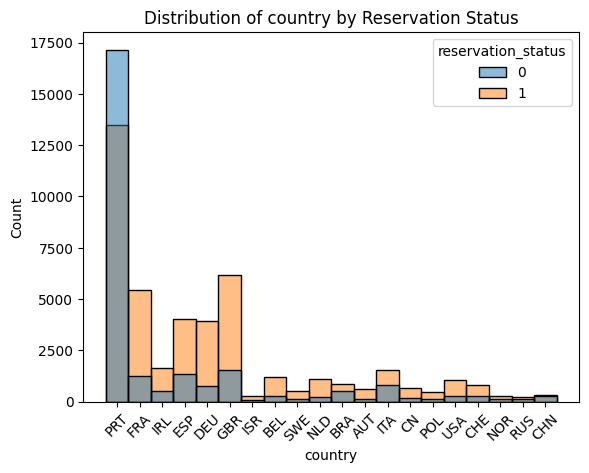

In [32]:
col = 'country'
print(str_train[col].value_counts().sum())
print(str_train[col].value_counts()[:20])
top_20_countries = str_train[str_train[col].isin(str_train[col].value_counts()[:20].index)]
# Create the histogram plot
plt.figure()
sns.histplot(data=top_20_countries, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [33]:
col = 'country'
outlier_bound = str_train.shape[0] * 0.03
print(outlier_bound)
outlier_countries = str_train[str_train[col].map(str_train[col].value_counts()) < outlier_bound]
print(outlier_countries[col].nunique())
print(outlier_countries["reservation_status"].value_counts())


2269.08
158
reservation_status
1    13204
0     4633
Name: count, dtype: Int64


In [34]:
col = 'country'
print(str_train[col].isna().sum())
no_country = str_train[str_train[col].isna()]
print(no_country['reservation_status'].value_counts())


325
reservation_status
1    283
0     42
Name: count, dtype: Int64


#### Countries which are more likely to cancel

In [35]:
country_reservation_status = str_train.groupby('country')['reservation_status'].value_counts().unstack().fillna(0)

countries_more_0_than_1 = country_reservation_status[country_reservation_status['0'] > country_reservation_status['1']].index.tolist()

print(countries_more_0_than_1)

['AND', 'ARE', 'BEN', 'BGD', 'BHR', 'DOM', 'FRO', 'GEO', 'GGY', 'GHA', 'GIB', 'GLP', 'HKG', 'HND', 'IDN', 'JEY', 'KHM', 'MAC', 'MDV', 'MYT', 'PAK', 'PHL', 'PRT', 'QAT', 'SAU', 'SEN', 'TJK', 'UZB', 'VEN', 'VGB', 'ZMB', 'ZWE']


In [36]:
for i in countries_more_0_than_1:
    print(f'{i} reservation distribution : {str_train[str_train["country"]==i]["reservation_status"].value_counts()}')

AND reservation distribution : reservation_status
0    4
1    2
Name: count, dtype: Int64
ARE reservation distribution : reservation_status
0    27
1     8
Name: count, dtype: Int64
BEN reservation distribution : reservation_status
0    3
Name: count, dtype: Int64
BGD reservation distribution : reservation_status
0    6
1    1
Name: count, dtype: Int64
BHR reservation distribution : reservation_status
0    2
Name: count, dtype: Int64
DOM reservation distribution : reservation_status
0    6
1    3
Name: count, dtype: Int64
FRO reservation distribution : reservation_status
0    2
1    1
Name: count, dtype: Int64
GEO reservation distribution : reservation_status
0    8
1    5
Name: count, dtype: Int64
GGY reservation distribution : reservation_status
0    1
Name: count, dtype: Int64
GHA reservation distribution : reservation_status
0    2
Name: count, dtype: Int64
GIB reservation distribution : reservation_status
0    10
1     5
Name: count, dtype: Int64
GLP reservation distribution : res

### Respect to Market Segment

market_segment
Online TA        35794
Offline TA/TO    15416
Groups           12515
Direct            7891
Corporate         3400
Complementary      473
Aviation           146
Undefined            1
Name: count, dtype: int64


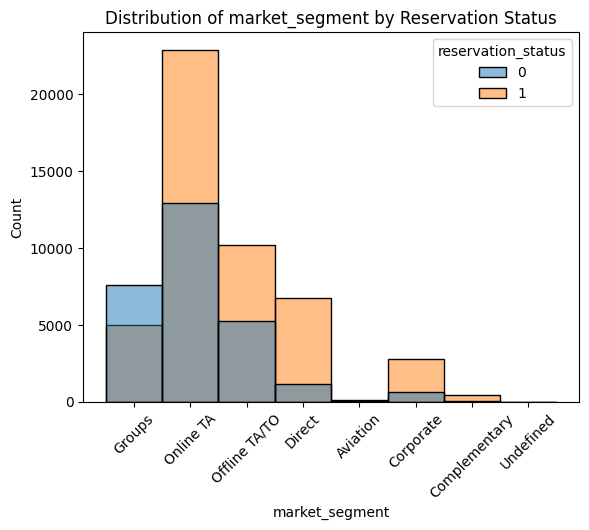

In [37]:
col = 'market_segment'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Distribution Channel

distribution_channel
TA/TO        62055
Direct        9201
Corporate     4248
GDS            128
Undefined        4
Name: count, dtype: int64


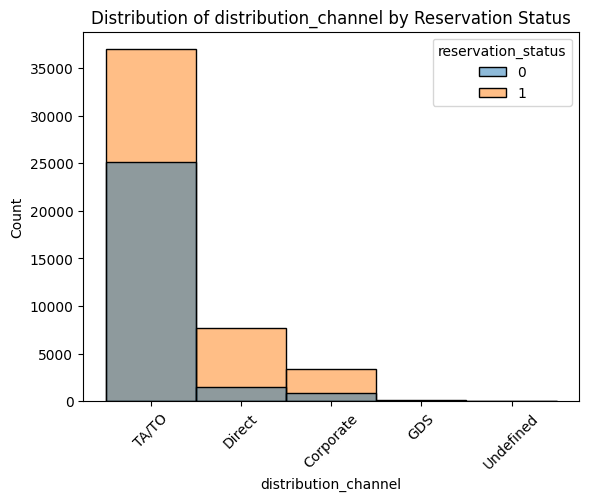

In [38]:
col = 'distribution_channel'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Repeated Guest

is_repeated_guest
0    73264
1     2372
Name: count, dtype: int64


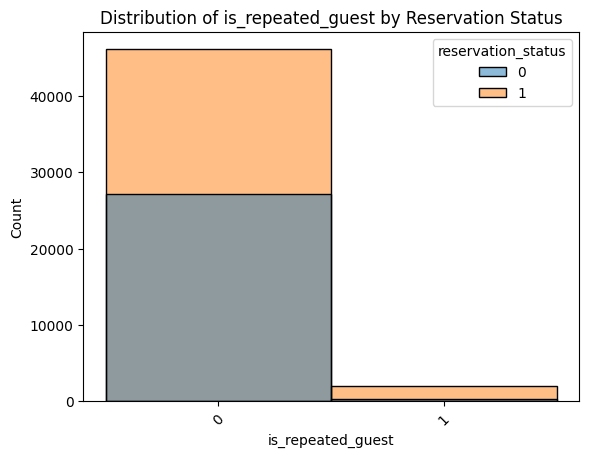

In [39]:
col = 'is_repeated_guest'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(ticks=[0,1],rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Previous Cancellations

previous_cancellations
0     71553
1      3809
2        66
3        46
24       28
4        26
11       19
26       18
25       16
5        16
19       11
6        10
13        9
14        8
21        1
Name: count, dtype: int64


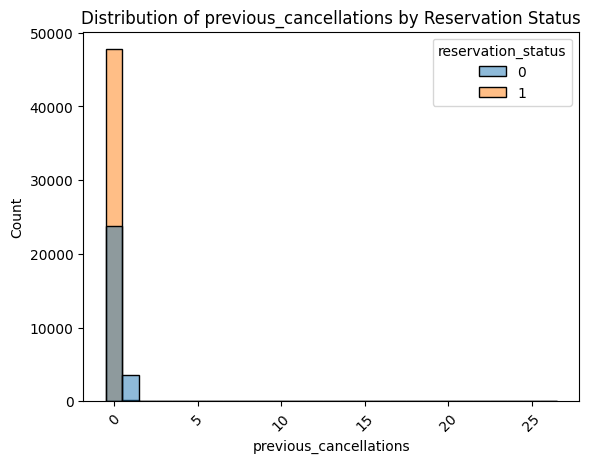

In [40]:
col = 'previous_cancellations'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Previous Bookings Not Canceled

Redundant with Has Cancelled so will be dropped

### Respect to Reserved Room Type

reserved_room_type
A    54353
D    12260
E     4121
F     1855
G     1347
B      715
C      575
H      398
P        9
L        3
Name: count, dtype: int64


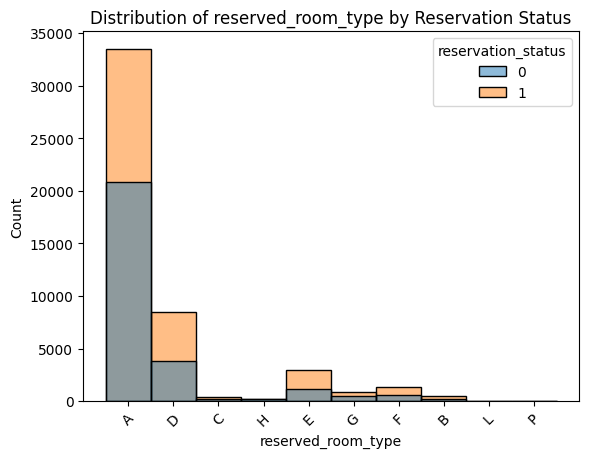

In [41]:
col = 'reserved_room_type'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Assigned Room Type

assigned_room_type
A    46802
D    16116
E     4934
F     2401
G     1658
C     1486
B     1367
H      465
I      220
K      178
P        9
Name: count, dtype: int64


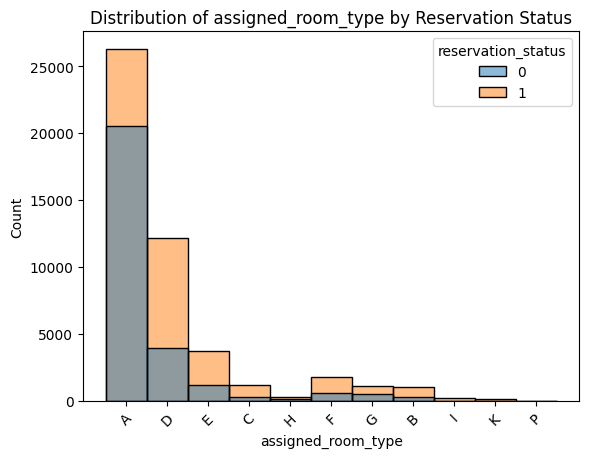

In [42]:
col = 'assigned_room_type'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Booking Changes

booking_changes
0     64175
1      8046
2      2410
3       607
4       238
5        72
6        40
7        13
8         8
9         7
10        6
16        2
11        2
13        2
14        2
12        2
18        1
17        1
20        1
15        1
Name: count, dtype: int64


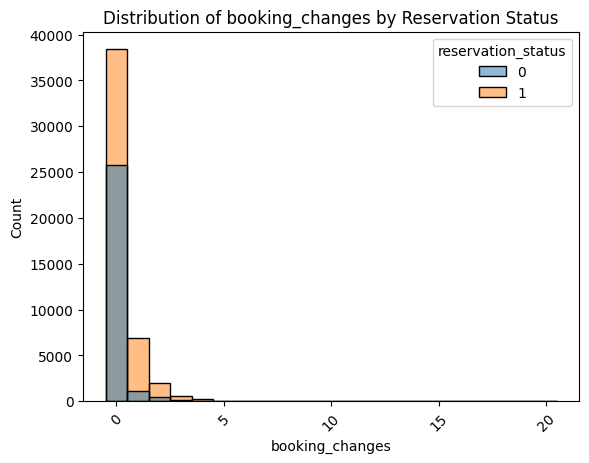

In [43]:
col = 'booking_changes'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Deposit Type

deposit_type
No Deposit    66304
Non Refund     9240
Refundable       92
Name: count, dtype: int64


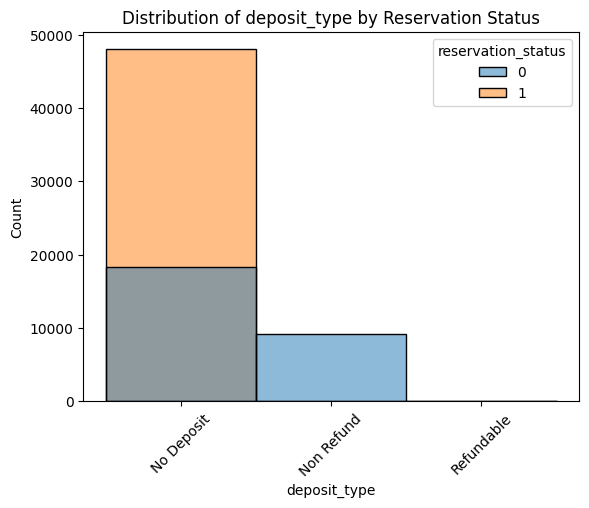

In [44]:
col = 'deposit_type'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [45]:
str_train[str_train['deposit_type'] == 'Non Refund']['reservation_status'].value_counts()

reservation_status
0    9174
1      66
Name: count, dtype: Int64

### Respect to Agent

agent
9.0      20257
240.0     8748
1.0       4520
14.0      2310
7.0       2264
         ...  
107.0        1
301.0        1
294.0        1
438.0        1
304.0        1
Name: count, Length: 310, dtype: int64


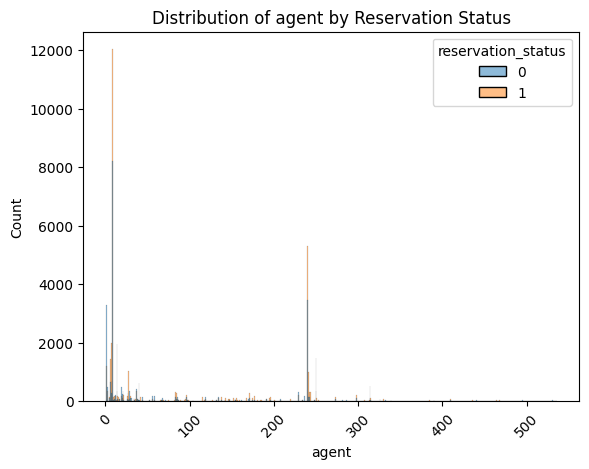

In [46]:
col = 'agent'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [47]:
na_agent = str_train[str_train['agent'].isna()]
col = 'agent'
print(na_agent['reservation_status'].value_counts())

reservation_status
1    7813
0    2454
Name: count, dtype: Int64


### Respect to Company

company
40.0     589
223.0    481
67.0     171
45.0     160
153.0    129
        ... 
347.0      1
332.0      1
54.0       1
245.0      1
318.0      1
Name: count, Length: 318, dtype: int64


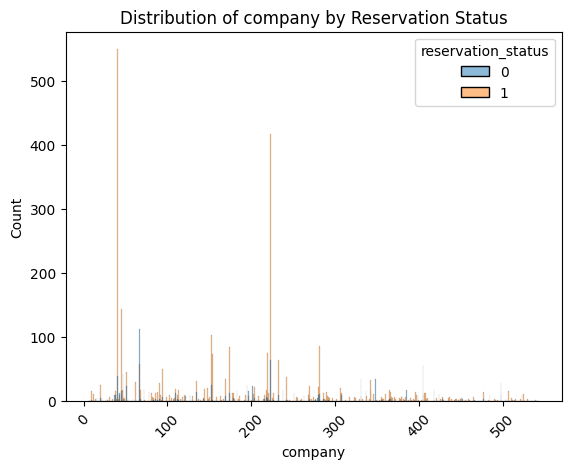

In [48]:
col = 'company'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [49]:
na_agent = str_train[str_train['company'].isna()]
print(na_agent['reservation_status'].value_counts())

reservation_status
1    44522
0    26827
Name: count, dtype: Int64


### Respect to Days In Waiting List

days_in_waiting_list
0      73278
39       151
58       106
31        85
44        82
       ...  
83         1
81         1
54         1
76         1
167        1
Name: count, Length: 119, dtype: int64


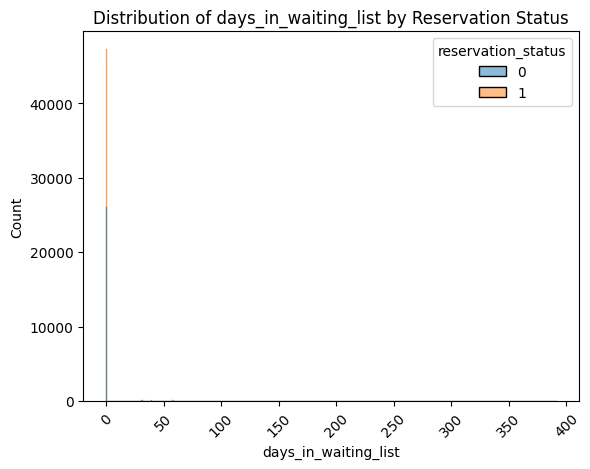

In [50]:
col = 'days_in_waiting_list'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Didn't wait Reservation Count:
reservation_status
1    47265
0    26013
Name: count, dtype: Int64
Waited Reservation Count:
reservation_status
0    1515
1     843
Name: count, dtype: Int64


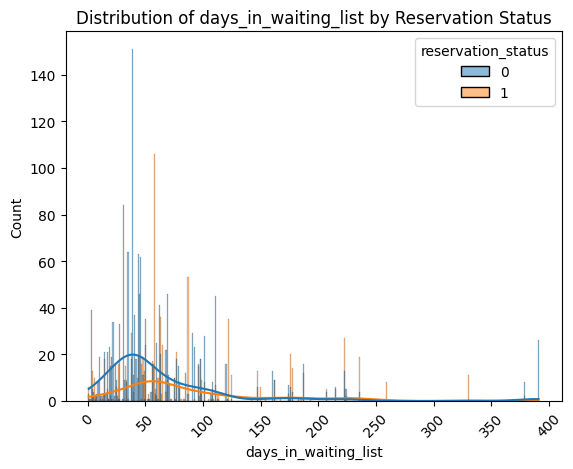

In [51]:
col = 'days_in_waiting_list'
waited =str_train[str_train[col] != 0]
print("Didn't wait Reservation Count:")
print(str_train[str_train[col] == 0]['reservation_status'].value_counts())
print("Waited Reservation Count:")
print(waited['reservation_status'].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=waited, x=col, discrete=True, hue='reservation_status',kde=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Customer Type

customer_type
Transient          56740
Transient-Party    15953
Contract            2583
Group                360
Name: count, dtype: int64


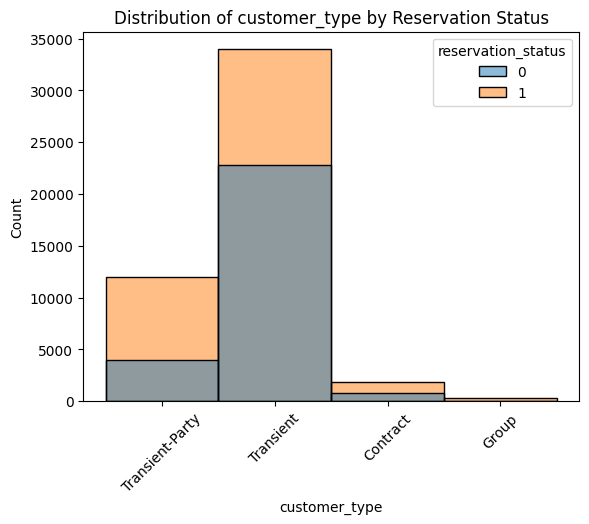

In [52]:
col = 'customer_type'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to ADR

adr
62.00     2387
75.00     1711
90.00     1539
65.00     1526
0.00      1237
          ... 
58.14        1
162.79       1
95.24        1
235.67       1
133.44       1
Name: count, Length: 7137, dtype: int64


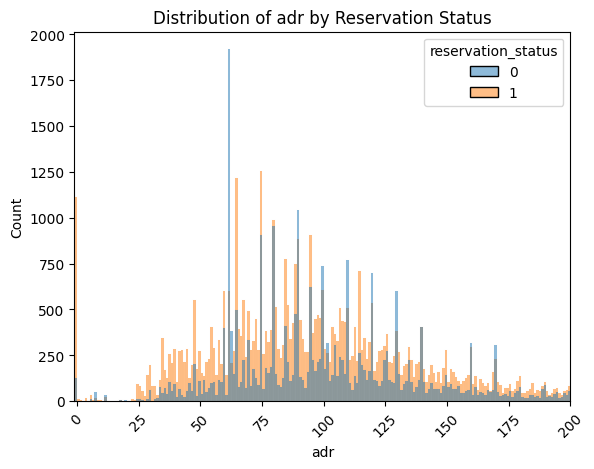

In [53]:
col = 'adr'
str_train[col] = str_train[col].astype(float)
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlim(-1,200)
plt.show()

since high peaks appear which could bias the outcome, we will place them into bins instead based on the stdev distance to the mean

In [54]:
print("ADR MEAN")
print(str_train['adr'].mean())
print("ADR STD")
print(str_train['adr'].std())
str_train['adr'].nlargest(20)

ADR MEAN
101.9326240150193
ADR STD
51.92882667027038


11426    5400.00
320       508.00
7357      450.00
33615     437.00
42765     426.25
75046     402.00
3714      397.38
42778     392.00
3543      388.00
57011     388.00
63276     387.00
56379     384.00
38832     383.00
16808     378.00
39588     378.00
43087     378.00
55155     378.00
44439     377.00
55989     375.50
13325     372.71
Name: adr, dtype: float64

#### ADR based on Room Type

In [55]:
no_zero = str_train[str_train['adr'] != 0]
for i in str_train['reserved_room_type'].unique():
    print(f'{i} count : {str_train[str_train["reserved_room_type"]==i].shape[0]}')
    print(f'{i} adr distribution : {no_zero[no_zero["reserved_room_type"]==i]["adr"].mean()}')

A count : 54353
A adr distribution : 92.39817101693329
D count : 12260
D adr distribution : 122.04089344532278
C count : 575
C adr distribution : 162.43293805309736
H count : 398
H adr distribution : 190.30241116751267
E count : 4121
E adr distribution : 126.59084402764067
G count : 1347
G adr distribution : 183.29008500772798
F count : 1855
F adr distribution : 170.45339591385977
B count : 715
B adr distribution : 91.90269175108537
L count : 3
L adr distribution : 139.33333333333334
P count : 9
P adr distribution : nan


this will be the inputted values for the 0 adr since it's not possible

### Respect to Required Car Parking Spaces

required_car_parking_spaces
0    70931
1     4683
2       19
3        2
8        1
Name: count, dtype: int64


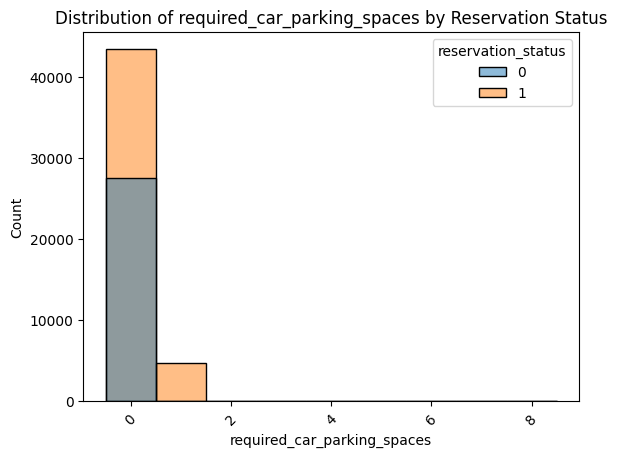

In [56]:
col = 'required_car_parking_spaces'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## ADR Distribution

### Respect to Month

<Axes: xlabel='arrival_date_month', ylabel='adr'>

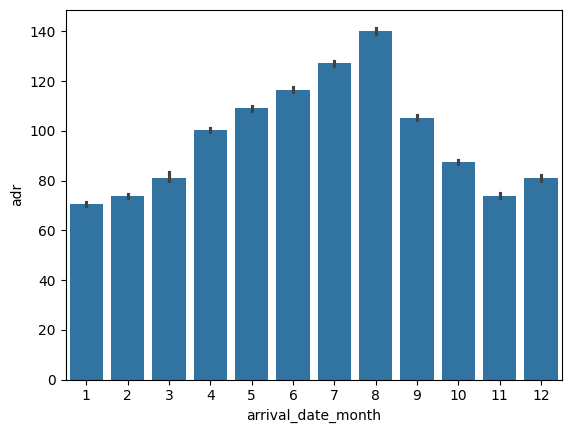

In [57]:
sns.barplot(data=str_train,x='arrival_date_month',y='adr')

# Feature Engineering

## Total Stay Duration Column

In [11]:
str_train['total_nights'] = str_train['stays_in_weekend_nights'] + str_train['stays_in_week_nights']
print(str_train['total_nights'].value_counts())
print(f'upper bound : {str_train["total_nights"].mean() + 2*str_train["total_nights"].std()}')

total_nights
2     17474
3     17233
1     13250
4     10986
7      5513
5      4955
6      2454
8       739
10      714
14      603
9       521
0       439
11      245
12      146
13       83
21       48
15       46
25       28
28       26
16       25
18       20
17       15
19       11
29        9
30        9
22        7
20        6
23        6
27        4
42        4
33        3
26        3
35        2
24        1
69        1
38        1
46        1
57        1
45        1
56        1
48        1
60        1
Name: count, dtype: int64
upper bound : 8.595085088412524


## Long Stay Column

we will take the upper bound based on the empirical rule which is mean + 2*std as the upper bound to decide whether it's a long stay or not

In [12]:
str_train['long_stay'] = str_train['total_nights'].apply(lambda x: 1 if x >= 8 else 0)
print(str_train['long_stay'].value_counts())

long_stay
0    72304
1     3332
Name: count, dtype: int64


## Adult Column Binning

Since from the previous EDA done, we found that every entry with the adult value being 5+ results in 0, we will bin them accordingly

In [13]:
str_train['n_adult'] = str_train['adults'].apply(lambda x: "5+" if x >= 5 else x)
print(str_train['n_adult'].value_counts())

n_adult
2     56716
1     14607
3      4008
0       252
4        43
5+       10
Name: count, dtype: int64


## Has Children Column

In [14]:
str_train['has_children'] = str_train['children'].apply(lambda x: 1 if x > 0 else 0)
print(str_train['has_children'].value_counts())

has_children
0    70182
1     5454
Name: count, dtype: int64


## Previous Bookings Not Canceled Dropping

Dropped since it's redundant with Previous Booking Canceled

In [15]:
str_train.drop("previous_bookings_not_canceled",axis=1,inplace=True)

## Has Baby Column
We will change this column into a bool column of having babies or not

In [16]:
str_train["has_baby"] = [1 if i > 0 else 0 for i in str_train["babies"]]
print(str_train["has_baby"].value_counts())

has_baby
0    75081
1      555
Name: count, dtype: int64


## Total Guests

In [17]:
str_train["total_guests"] = str_train["adults"] + str_train["children"] + str_train["babies"]
print(str_train["total_guests"].value_counts())

total_guests
2.0     51863
1.0     14329
3.0      6736
4.0      2485
0.0       122
5.0        89
26.0        2
27.0        2
20.0        2
10.0        1
6.0         1
55.0        1
Name: count, dtype: int64


## Lead Time Binning

In [18]:
str_train["n_lead_time"] = str_train["lead_time"].apply(lambda x: 0 if x == 0 else 1 if x < 200 else 2)
print(str_train["n_lead_time"].value_counts())

n_lead_time
1    58504
2    13166
0     3966
Name: count, dtype: int64


## Impute NA Country with NO COUNTRY Label

In [19]:
str_train["country"] = str_train["country"].fillna("Unknown")
print(str_train["country"].isna().sum())
print(str_train[str_train['country'] == 'Unknown']['reservation_status'].value_counts())

0
reservation_status
1    283
0     42
Name: count, dtype: int64


## Country Binning

using the empirical rule, we can set the outlier threshold to be countries which has occurences less than 0.3% of the total number of entries

In [20]:
thresh = str_train.shape[0] * 0.003
col='country'
print(thresh)
thresh_separated = str_train[str_train[col].map(str_train[col].value_counts()) > thresh]
in_countries = thresh_separated['country'].unique()
print(in_countries)

226.90800000000002
['PRT' 'FRA' 'IRL' 'ESP' 'DEU' 'GBR' 'ISR' 'ROU' 'BEL' 'SWE' 'NLD' 'BRA'
 'AUT' 'ITA' 'CN' 'POL' 'USA' 'CHE' 'Unknown' 'NOR' 'DNK' 'FIN' 'AUS'
 'RUS' 'CHN']


In [21]:
def country_binning(data):
    data['country'] = data['country'].apply(lambda x: 'Other' if x not in in_countries else x)
    return data

country_binning(str_train)
print(str_train['country'].value_counts())

country
PRT        30643
GBR         7690
FRA         6698
ESP         5384
DEU         4689
Other       3138
ITA         2370
IRL         2160
BEL         1474
BRA         1412
USA         1356
NLD         1344
CHE         1088
CN           840
AUT          781
SWE          678
CHN          622
POL          602
ISR          403
NOR          386
RUS          385
Unknown      325
ROU          311
AUS          292
FIN          290
DNK          275
Name: count, dtype: int64


## Market Segment Binning

In [22]:
str_train["n_market"] = [i if i in ["Online TA","Offline TA/TO","Groups","Direct","Corporate"] else "Other" for i in str_train["market_segment"]]
print(str_train["n_market"].value_counts())

n_market
Online TA        35794
Offline TA/TO    15416
Groups           12515
Direct            7891
Corporate         3400
Other              620
Name: count, dtype: int64


## Distribution Channel Binning

In [23]:
str_train["n_channel"] = [i if i in ["TA/TO","Direct","Corporate"] else "Other" for i in str_train["distribution_channel"]]
print(str_train["n_channel"].value_counts())

n_channel
TA/TO        62055
Direct        9201
Corporate     4248
Other          132
Name: count, dtype: int64


## Has Cancelled Binning

In [24]:
str_train["has_cancelled"] = [1 if i > 0 else 0 for i in str_train["previous_cancellations"]]
print(str_train["has_cancelled"].value_counts())

has_cancelled
0    71553
1     4083
Name: count, dtype: int64


## Different Reservation and Assigned Rooms

In [25]:
str_train["room_change"] = [1 if i != j else 0 for i,j in zip(str_train["reserved_room_type"],str_train["assigned_room_type"])]
print(str_train["room_change"].value_counts())

room_change
0    66217
1     9419
Name: count, dtype: int64


room_change
0    66217
1     9419
Name: count, dtype: int64


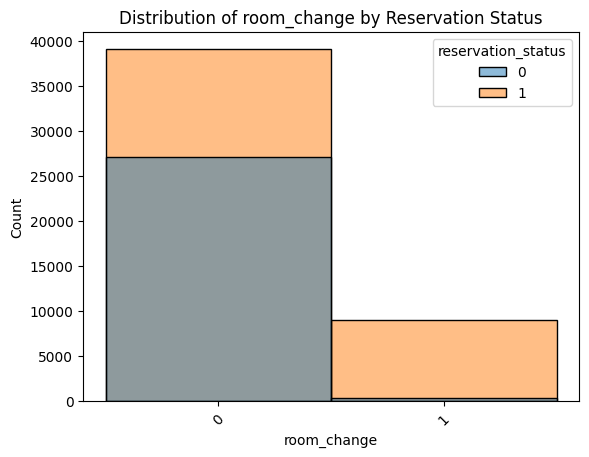

In [26]:
col = 'room_change'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(ticks=[0,1],rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [27]:
for i in range(0,2):
    print(f'{i} reservation distribution : {str_train[str_train["room_change"]==i]["reservation_status"].value_counts()}')
    print(f'{i} success rate : {str_train[str_train["room_change"]==i]["reservation_status"].value_counts().iloc[0]/str_train[str_train["room_change"]==i].shape[0] *100:.2f}%')

0 reservation distribution : reservation_status
1    39092
0    27125
Name: count, dtype: int64
0 success rate : 59.04%
1 reservation distribution : reservation_status
1    9016
0     403
Name: count, dtype: int64
1 success rate : 95.72%


As we can see, the entries where the rooms are changed yielded better reservation success rates. This is probably due to the fact that hotels would upgrade the room rather than downgrade it when they are overbooked, leading to better customer satisfaction

## Booking Changes Binning

In [28]:
str_train["n_booking_changes"] = [i if i < 5 else "5+" for i in str_train["booking_changes"]]
print(str_train["n_booking_changes"].value_counts())

n_booking_changes
0     64175
1      8046
2      2410
3       607
4       238
5+      160
Name: count, dtype: int64


## Imputing Missing Agent Column

In [29]:
str_train['agent'] = str_train['agent'].fillna('Unknown')
print(str_train['agent'].isna().sum())

0


## Agent Binning

In [30]:
thresh = str_train.shape[0] * 0.003
col = 'agent'
print(thresh)
thresh_separated = str_train[str_train[col].map(str_train[col].value_counts()) > thresh]
in_agents = thresh_separated['agent'].unique()
print(in_agents)

226.90800000000002
[298.0 9.0 3.0 'Unknown' 7.0 6.0 250.0 1.0 134.0 240.0 21.0 242.0 27.0
 14.0 40.0 12.0 56.0 171.0 8.0 15.0 241.0 96.0 314.0 26.0 85.0 243.0 29.0
 30.0 20.0 229.0 28.0 19.0 11.0 37.0 22.0 83.0]


In [31]:
def agent_binning(data):
    data['agent'] = data['agent'].apply(lambda x: 'Other' if x not in in_agents else x)
    return data
agent_binning(str_train)
print(str_train['agent'].value_counts())

agent
9.0        20257
Unknown    10267
Other       9653
240.0       8748
1.0         4520
14.0        2310
7.0         2264
6.0         2098
250.0       1828
241.0       1142
28.0        1072
8.0          926
3.0          846
37.0         763
19.0         672
40.0         670
314.0        617
21.0         576
229.0        516
242.0        478
83.0         457
29.0         434
171.0        389
12.0         376
85.0         365
20.0         349
243.0        338
96.0         335
298.0        309
27.0         286
30.0         282
134.0        266
22.0         250
11.0         249
26.0         244
15.0         243
56.0         241
Name: count, dtype: int64


## Imputing Missing Company Column

In [32]:
str_train['company'] = str_train['company'].fillna('Unknown')
print(str_train['company'].isna().sum())

0


## Company Binning

In [33]:
thresh = str_train.shape[0] * 0.003
col = 'company'
print(thresh)
thresh_separated = str_train[str_train[col].map(str_train[col].value_counts()) > thresh]
in_companies = thresh_separated['company'].unique()
print(in_companies)

226.90800000000002
['Unknown' 40.0 223.0]


In [34]:
def company_binning(data):
    data['company'] = data['company'].apply(lambda x: 'Other' if x not in in_companies else x)
    return data
company_binning(str_train)
print(str_train['company'].value_counts())

company
Unknown    71349
Other       3217
40.0         589
223.0        481
Name: count, dtype: int64


## Waiting List Binning

In [35]:
str_train['n_waiting'] = [1 if i > 0 else 0 for i in str_train['days_in_waiting_list']]
print(str_train['n_waiting'].value_counts())

n_waiting
0    73278
1     2358
Name: count, dtype: int64


## ADR Preparation

In [36]:
def adr_prep(data):
    mean_map = {'A':92.39,'B':91.9,'C':162.43,'D':122.04,'E':126.59,'F':170.45,'G':183.29,'H':190.30,'L':139.33}
    mean = 101.93
    data['adr'] = data.apply(lambda row: mean_map[row['reserved_room_type']] if row['adr'] == 0 and row['reserved_room_type'] in mean_map else row['adr'], axis=1)
    data['adr'] = data['adr'].replace(0,mean)
    data['adr'] = data['adr'].apply(lambda x: mean if x < 0 else x)
    data['adr'] = data['adr'].fillna(mean)


    max = data['adr'].max()
    stdev = 51.92882667027038
    empirical_upper_bound = stdev + mean
    empirical_lower_bound = mean - stdev
    data['adr_cat'] = pd.cut(data['adr'],bins=[-1,empirical_lower_bound,empirical_upper_bound,max+1],labels=[1,2,3])
    return data
    

In [37]:
adr_prep(str_train)

,id,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,has_baby,total_guests,n_lead_time,n_market,n_channel,has_cancelled,room_change,n_booking_changes,n_waiting,adr_cat
0,0,Resort Hotel,312,2017,March,10,5,2,5,2,...,0,2.0,2,Groups,TA/TO,0,0,0,0,2
1,1,City Hotel,2,2015,December,51,18,0,2,2,...,0,3.0,1,Online TA,TA/TO,0,0,1,0,2
2,2,City Hotel,41,2016,March,14,31,0,3,2,...,0,2.0,1,Online TA,TA/TO,0,0,0,0,2
3,3,Resort Hotel,228,2016,August,36,29,2,5,2,...,0,2.0,2,Offline TA/TO,TA/TO,0,0,0,0,2
4,4,City Hotel,128,2017,May,19,13,0,1,3,...,0,3.0,1,Online TA,TA/TO,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75631,75631,Resort Hotel,2,2016,January,4,23,0,1,2,...,0,2.0,1,Online TA,TA/TO,0,0,0,0,1
75632,75632,City Hotel,332,2017,July,26,1,2,2,2,...,0,2.0,2,Online TA,TA/TO,0,0,0,0,2
75633,75633,City Hotel,151,2016,January,4,19,0,2,1,...,0,1.0,1,Offline TA/TO,TA/TO,0,0,2,1,2
75634,75634,City Hotel,137,2017,August,35,29,0,5,1,...,0,1.0,1,Online TA,TA/TO,0,0,0,0,2


## Total Cost

In [38]:
str_train['total_price'] = str_train['adr'] * (str_train['total_nights'])

## Cost Per Person

In [39]:
str_train['cost_per_night'] = str_train['adr'] / (str_train['total_guests'])

## Waitlist Ratio

In [40]:
str_train['wait_ratio'] = [i/j if i != 0 and j != 0 else 0 for i,j in zip(str_train['days_in_waiting_list'],str_train['lead_time'])]
print(str_train['wait_ratio'].value_counts())

wait_ratio
0.000000    73278
0.207447       72
0.196203       67
0.840580       56
0.621429       54
            ...  
0.095890        1
0.421320        1
0.356322        1
0.156250        1
0.830357        1
Name: count, Length: 288, dtype: int64


## Parking Space Binning

In [41]:
str_train['n_parking'] = [1 if i > 0 else 0 for i in str_train['required_car_parking_spaces']]
print(str_train['n_parking'].value_counts())

n_parking
0    70931
1     4705
Name: count, dtype: int64


# Feature Engineering Function

we combine all of the Feature Engineering done above as a single function

In [42]:
def feat_eng(data:pd.DataFrame):
    data.drop("id",axis=1,inplace=True)
    data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
    data['long_stay'] = data['total_nights'].apply(lambda x: 1 if x >= 8 else 0)
    data['n_adult'] = data['adults'].apply(lambda x: "5+" if x >= 5 else x)
    data['has_children'] = data['children'].apply(lambda x: 1 if x > 0 else 0)
    data.drop("previous_bookings_not_canceled",axis=1,inplace=True)
    data['has_baby'] = [1 if i > 0 else 0 for i in data['babies']]
    data['total_guests'] = data['adults'] + data['children'] + data['babies']
    data["n_lead_time"] = data["lead_time"].apply(lambda x: "no" if x == 0 else "short" if x < 200 else "long")
    data['country'] = data['country'].fillna("Unknown")
    country_binning(data)
    data['n_market'] = [i if i in ["Online TA","Offline TA/TO","Groups","Direct","Corporate"] else "Other" for i in data['market_segment']]
    data['n_channel'] = [i if i in ["TA/TO","Direct","Corporate"] else "Other" for i in data['distribution_channel']]
    data['has_cancelled'] = [1 if i > 0 else 0 for i in data['previous_cancellations']]
    data['room_change'] = [1 if i != j else 0 for i,j in zip(data['reserved_room_type'],data['assigned_room_type'])]
    data['n_booking_changes'] = [i if i < 5 else "5+" for i in data['booking_changes']]
    data['agent'] = data['agent'].fillna('Unknown')
    agent_binning(data)
    data['company'] = data['company'].fillna('Unknown')
    company_binning(data)
    data['n_waiting'] = [1 if i > 0 else 0 for i in data['days_in_waiting_list']]
    adr_prep(data)
    data['n_parking'] = [1 if i > 0 else 0 for i in data['required_car_parking_spaces']]
    data['total_price'] = data['adr'] * (data['total_nights'])
    data['cost_per_night'] = data['adr'] / (data['total_guests'])
    data['wait_ratio'] = [i/j if i != 0 and j != 0 else 0 for i,j in zip(data['days_in_waiting_list'],data['lead_time'])]
    month_to_number = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
        }
    data['arrival_date_month'] = data['arrival_date_month'].map(month_to_number)

    data.drop(['adults','children','babies','market_segment','distribution_channel',
               'previous_cancellations','booking_changes','days_in_waiting_list',
               'required_car_parking_spaces'],axis=1,inplace=True)
    numerical = ['adr','total_nights','stays_in_weekend_nights','stays_in_week_nights','lead_time','total_price','cost_per_night','wait_ratio','total_guests']
    for i in data.columns:
        if i not in numerical:
            data[i] = data[i].astype("category")

In [43]:
def feat_eng_2(data:pd.DataFrame):
    data.drop("id",axis=1,inplace=True)
    data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
    data['long_stay'] = data['total_nights'].apply(lambda x: 1 if x >= 8 else 0)
    # data['n_adult'] = data['adults'].apply(lambda x: "5+" if x >= 5 else x)
    # data['has_children'] = data['children'].apply(lambda x: 1 if x > 0 else 0)
    data.drop("previous_bookings_not_canceled",axis=1,inplace=True)
    data['has_baby'] = [1 if i > 0 else 0 for i in data['babies']]
    data['total_guests'] = data['adults'] + data['children'] + data['babies']
    data["n_lead_time"] = data["lead_time"].apply(lambda x: 0 if x == 0 else 1 if x < 200 else 2)
    data['country'] = data['country'].fillna("Unknown")
    country_binning(data)
    data['n_market'] = [i if i in ["Online TA","Offline TA/TO","Groups","Direct","Corporate"] else "Other" for i in data['market_segment']]
    data['n_channel'] = [i if i in ["TA/TO","Direct","Corporate"] else "Other" for i in data['distribution_channel']]
    data['has_cancelled'] = [1 if i > 0 else 0 for i in data['previous_cancellations']]
    data['room_change'] = [1 if i != j else 0 for i,j in zip(data['reserved_room_type'],data['assigned_room_type'])]
    # data['n_booking_changes'] = [i if i < 5 else "5+" for i in data['booking_changes']]
    data['agent'] = data['agent'].fillna('Unknown')
    agent_binning(data)
    data['company'] = data['company'].fillna('Unknown')
    company_binning(data)
    data['n_waiting'] = [1 if i > 0 else 0 for i in data['days_in_waiting_list']]
    adr_prep(data)
    data['n_parking'] = [1 if i > 0 else 0 for i in data['required_car_parking_spaces']]
    data['total_price'] = data['adr'] * (data['total_nights'])
    data['cost_per_night'] = data['adr'] / (data['total_guests'])
    data['wait_ratio'] = [i/j if j != 0 else 0 for i,j in zip(data['days_in_waiting_list'],data['lead_time'])]
    month_to_number = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
        }
    data['arrival_date_month'] = data['arrival_date_month'].map(month_to_number)

    data.drop(['babies','market_segment','distribution_channel',
               'previous_cancellations','days_in_waiting_list',
               'required_car_parking_spaces'],axis=1,inplace=True)
    numerical = ['adr','total_nights','stays_in_weekend_nights','stays_in_week_nights','lead_time','total_price','cost_per_night','wait_ratio','total_guests','adults','children','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month'
                 ]
    for i in data.columns:
        if i not in numerical:
            data[i] = data[i].astype("category")

# Data Preparation

In [44]:
prep_train = df_train.copy()

In [45]:
feat_eng_2(prep_train)
X = prep_train.drop('reservation_status',axis=1)
y = prep_train['reservation_status'].astype("int")

In [46]:
categorical = X.select_dtypes(include=['category']).columns
print(categorical)

Index(['hotel', 'meal', 'country', 'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'customer_type', 'long_stay', 'has_baby', 'n_lead_time',
       'n_market', 'n_channel', 'has_cancelled', 'room_change', 'n_waiting',
       'adr_cat', 'n_parking'],
      dtype='object')


In [47]:
one_hot_cols = ['hotel', 'meal', 'country', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'company','n_market', 'n_channel','customer_type']

In [48]:
ordinal_cols = ['agent']

In [49]:
non_encoded = X.columns.difference(one_hot_cols + ordinal_cols)
print(non_encoded)

Index(['adr', 'adr_cat', 'adults', 'arrival_date_day_of_month',
       'arrival_date_month', 'arrival_date_week_number', 'arrival_date_year',
       'booking_changes', 'children', 'cost_per_night', 'has_baby',
       'has_cancelled', 'is_repeated_guest', 'lead_time', 'long_stay',
       'n_lead_time', 'n_parking', 'n_waiting', 'room_change',
       'stays_in_week_nights', 'stays_in_weekend_nights', 'total_guests',
       'total_nights', 'total_price', 'wait_ratio'],
      dtype='object')


In [50]:
X[non_encoded] = X[non_encoded].astype("float")

In [51]:
X[one_hot_cols] = X[one_hot_cols].astype(str)

## Ordinal Encoding

In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
X[ordinal_cols] = X[ordinal_cols].astype(str)

ordi_enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
X[ordinal_cols] = ordi_enc.fit_transform(X[ordinal_cols])

In [54]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,n_market,n_channel,has_cancelled,room_change,n_waiting,adr_cat,n_parking,total_price,cost_per_night,wait_ratio
0,Resort Hotel,312.0,2017.0,3.0,10.0,5.0,2.0,5.0,2.0,0.0,...,Groups,TA/TO,0.0,0.0,0.0,2.0,0.0,392.0,28.000000,0.0
1,City Hotel,2.0,2015.0,12.0,51.0,18.0,0.0,2.0,2.0,1.0,...,Online TA,TA/TO,0.0,0.0,0.0,2.0,0.0,194.0,32.333333,0.0
2,City Hotel,41.0,2016.0,3.0,14.0,31.0,0.0,3.0,2.0,0.0,...,Online TA,TA/TO,0.0,0.0,0.0,2.0,0.0,353.7,58.950000,0.0
3,Resort Hotel,228.0,2016.0,8.0,36.0,29.0,2.0,5.0,2.0,0.0,...,Offline TA/TO,TA/TO,0.0,0.0,0.0,2.0,0.0,604.8,43.200000,0.0
4,City Hotel,128.0,2017.0,5.0,19.0,13.0,0.0,1.0,3.0,0.0,...,Online TA,TA/TO,0.0,0.0,0.0,2.0,0.0,144.0,48.000000,0.0


## One Hot Encoding

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
one_coder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
one_hot_encoded = one_coder.fit_transform(X[one_hot_cols])
one_hot_df = pd.DataFrame(one_hot_encoded,columns=one_coder.get_feature_names_out(one_hot_cols))
X.drop(one_hot_cols,axis=1,inplace=True)
X = pd.concat([X,one_hot_df],axis=1)

In [57]:
X.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,...,n_market_Online TA,n_market_Other,n_channel_Corporate,n_channel_Direct,n_channel_Other,n_channel_TA/TO,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,312.0,2017.0,3.0,10.0,5.0,2.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,2015.0,12.0,51.0,18.0,0.0,2.0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,41.0,2016.0,3.0,14.0,31.0,0.0,3.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,228.0,2016.0,8.0,36.0,29.0,2.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,128.0,2017.0,5.0,19.0,13.0,0.0,1.0,3.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Transformations

In [58]:
num = X.select_dtypes(include=['int64','float64']).columns
num = num.drop(['arrival_date_year','arrival_date_month','arrival_date_week_number', 'arrival_date_day_of_month','agent'])
print(num)

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'is_repeated_guest', 'booking_changes', 'adr',
       'total_nights', 'long_stay', 'has_baby', 'total_guests', 'n_lead_time',
       'has_cancelled', 'room_change', 'n_waiting', 'adr_cat', 'n_parking',
       'total_price', 'cost_per_night', 'wait_ratio', 'hotel_City Hotel',
       'hotel_Resort Hotel', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'country_AUS', 'country_AUT', 'country_BEL',
       'country_BRA', 'country_CHE', 'country_CHN', 'country_CN',
       'country_DEU', 'country_DNK', 'country_ESP', 'country_FIN',
       'country_FRA', 'country_GBR', 'country_IRL', 'country_ISR',
       'country_ITA', 'country_NLD', 'country_NOR', 'country_Other',
       'country_POL', 'country_PRT', 'country_ROU', 'country_RUS',
       'country_SWE', 'country_USA', 'country_Unknown', 'reserved_room_type_A',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_

In [59]:
X[num].skew()

c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


lead_time                         1.346072
stays_in_weekend_nights           1.452129
stays_in_week_nights              3.026394
adults                           15.975519
children                          4.013606
                                   ...    
n_channel_TA/TO                  -1.669795
customer_type_Contract            5.130169
customer_type_Group              14.391421
customer_type_Transient          -1.155782
customer_type_Transient-Party     1.417234
Length: 96, dtype: float64

In [60]:
X['cost_per_night'].nlargest(20)

273     inf
338     inf
882     inf
1329    inf
1886    inf
2237    inf
2613    inf
3520    inf
3620    inf
4021    inf
4041    inf
4274    inf
4565    inf
4636    inf
4914    inf
6207    inf
6244    inf
6751    inf
7140    inf
7280    inf
Name: cost_per_night, dtype: float64

In [61]:
X['cost_per_night'] = X[X['cost_per_night'] == np.inf]['cost_per_night'] = 0

In [62]:
X['adr'] = np.log1p(X['adr'])
X['wait_ratio'] = np.log1p(X['wait_ratio'])

In [63]:
X['adr'].skew()

-0.6407279860649976

## Pipeline

In [64]:
def pipeline(data):
    feat_eng_2(data)
    data[ordinal_cols] = data[ordinal_cols].astype(str)
    data[non_encoded] = data[non_encoded].astype("float")
    data[ordinal_cols] = ordi_enc.transform(data[ordinal_cols])
    data[one_hot_cols] = data[one_hot_cols].astype(str)
    one_hot_encoded = one_coder.transform(data[one_hot_cols])
    one_hot_df = pd.DataFrame(one_hot_encoded,columns=one_coder.get_feature_names_out(one_hot_cols))
    data.drop(one_hot_cols,axis=1,inplace=True)
    data = pd.concat([data,one_hot_df],axis=1)
    data['cost_per_night'] = data[data['cost_per_night'] == np.inf]['cost_per_night'] = 0
    data['adr'] = np.log1p(data['adr'])
    data['wait_ratio'] = np.log1p(data['wait_ratio'])

    return data

## Training Splitting

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=STATE)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60508, 101)
(15128, 101)
(60508,)
(15128,)


# Modelling

In [68]:
from catboost import CatBoostClassifier

In [69]:
cat_1 = CatBoostClassifier(verbose=False,random_state=STATE)

In [71]:
cat_1.fit(X_train, y_train)
test_preds = cat_1.predict(X_test)

In [72]:
pd.Series(test_preds).value_counts()

1    9854
0    5274
Name: count, dtype: int64

In [73]:
y_test.value_counts()

reservation_status
1    9622
0    5506
Name: count, dtype: int64

## Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix,classification_report

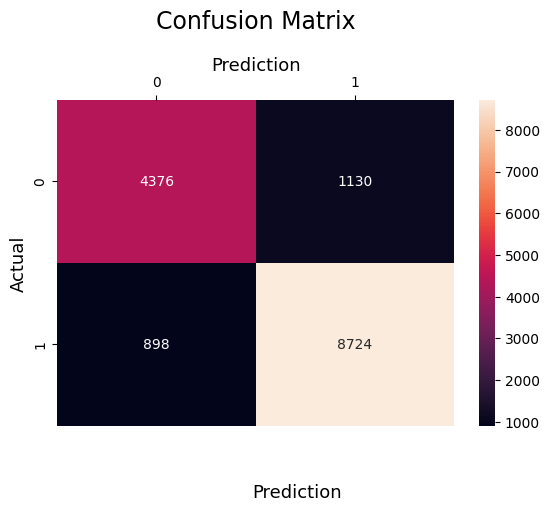

In [75]:
cm = confusion_matrix(y_test,test_preds)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [105]:
print(classification_report(test_preds, y_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      5157
           1       0.92      0.89      0.90      9971

    accuracy                           0.88     15128
   macro avg       0.86      0.87      0.86     15128
weighted avg       0.88      0.88      0.88     15128



## Hyperparameter Tuning

In [77]:
from sklearn.metrics import f1_score
import optuna
from optuna.samplers import TPESampler

c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#Use Optuna to find the best hyperparameters
def objective(trial):
    model = CatBoostClassifier(
        task_type="GPU",
        devices='0:1',
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-2, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-4, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

In [ ]:
optuna.logging.set_verbosity(optuna.logging.INFO)

sampler = TPESampler(seed=1)

In [ ]:
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2025-02-15 20:59:57,833] A new study created in memory with name: catboost
[I 2025-02-15 21:00:01,142] Trial 0 finished with value: 0.8836733650355372 and parameters: {'iterations': 475, 'learning_rate': 0.05251997291427973, 'depth': 4, 'l2_leaf_reg': 0.006516215458215695, 'bootstrap_type': 'Bayesian', 'random_strength': 2.0931628460945333e-07, 'bagging_temperature': 0.923385947687978, 'od_type': 'Iter', 'od_wait': 26}. Best is trial 0 with value: 0.8836733650355372.
[I 2025-02-15 21:00:07,273] Trial 1 finished with value: 0.8946291560102302 and parameters: {'iterations': 585, 'learning_rate': 0.026253941572909976, 'depth': 8, 'l2_leaf_reg': 0.0016854407828169394, 'bootstrap_type': 'Bayesian', 'random_strength': 0.7999391045172093, 'bagging_temperature': 0.27387593197926163, 'od_type': 'IncToDec', 'od_wait': 32}. Best is trial 1 with value: 0.8946291560102302.
[I 2025-02-15 21:00:10,505] Trial 2 finished with value: 0.8699249567057918 and parameters: {'iterations': 226, 'learning_ra

In [ ]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.9051423888547429
  Params: 
    iterations: 816
    learning_rate: 0.07023820300463823
    depth: 10
    l2_leaf_reg: 0.002215818001500353
    bootstrap_type: Bayesian
    random_strength: 2.75498523401471
    bagging_temperature: 0.29023694525856425
    od_type: IncToDec
    od_wait: 35


In [ ]:
mod2 = CatBoostClassifier(**trial.params, task_type="GPU", devices='0:1')
mod2.fit(X_train, y_train)
test_preds = mod2.predict(X_test)

0:	learn: 0.5902726	total: 19.5ms	remaining: 15.9s
1:	learn: 0.5180960	total: 36.4ms	remaining: 14.8s
2:	learn: 0.4718085	total: 53.5ms	remaining: 14.5s
3:	learn: 0.4359842	total: 71.3ms	remaining: 14.5s
4:	learn: 0.4109209	total: 92.4ms	remaining: 15s
5:	learn: 0.3934187	total: 110ms	remaining: 14.8s
6:	learn: 0.3785303	total: 127ms	remaining: 14.7s
7:	learn: 0.3669283	total: 145ms	remaining: 14.6s
8:	learn: 0.3552555	total: 162ms	remaining: 14.5s
9:	learn: 0.3489858	total: 179ms	remaining: 14.4s
10:	learn: 0.3411965	total: 196ms	remaining: 14.4s
11:	learn: 0.3369317	total: 213ms	remaining: 14.3s
12:	learn: 0.3326558	total: 230ms	remaining: 14.2s
13:	learn: 0.3284803	total: 247ms	remaining: 14.2s
14:	learn: 0.3257334	total: 269ms	remaining: 14.3s
15:	learn: 0.3236641	total: 286ms	remaining: 14.3s
16:	learn: 0.3214063	total: 303ms	remaining: 14.2s
17:	learn: 0.3195089	total: 319ms	remaining: 14.1s
18:	learn: 0.3181205	total: 336ms	remaining: 14.1s
19:	learn: 0.3165176	total: 352ms	rema

## Tuning 1 Model

In [104]:
# model_tuned = CatBoostClassifier(**trial.params,verbose=False)
model_tuned = CatBoostClassifier(
    task_type="GPU",
    devices='0:1',
    iterations= 816,
    learning_rate= 0.07023820300463823,
    depth= 10,
    l2_leaf_reg= 0.002215818001500353,
    bootstrap_type= "Bayesian",
    random_strength= 2.75498523401471,
    bagging_temperature= 0.29023694525856425,
    od_type= "IncToDec",
    od_wait= 35,
    verbose=False)
model_tuned.fit(X_train, y_train)
test_preds = model_tuned.predict(X_test)

## Feature Importance

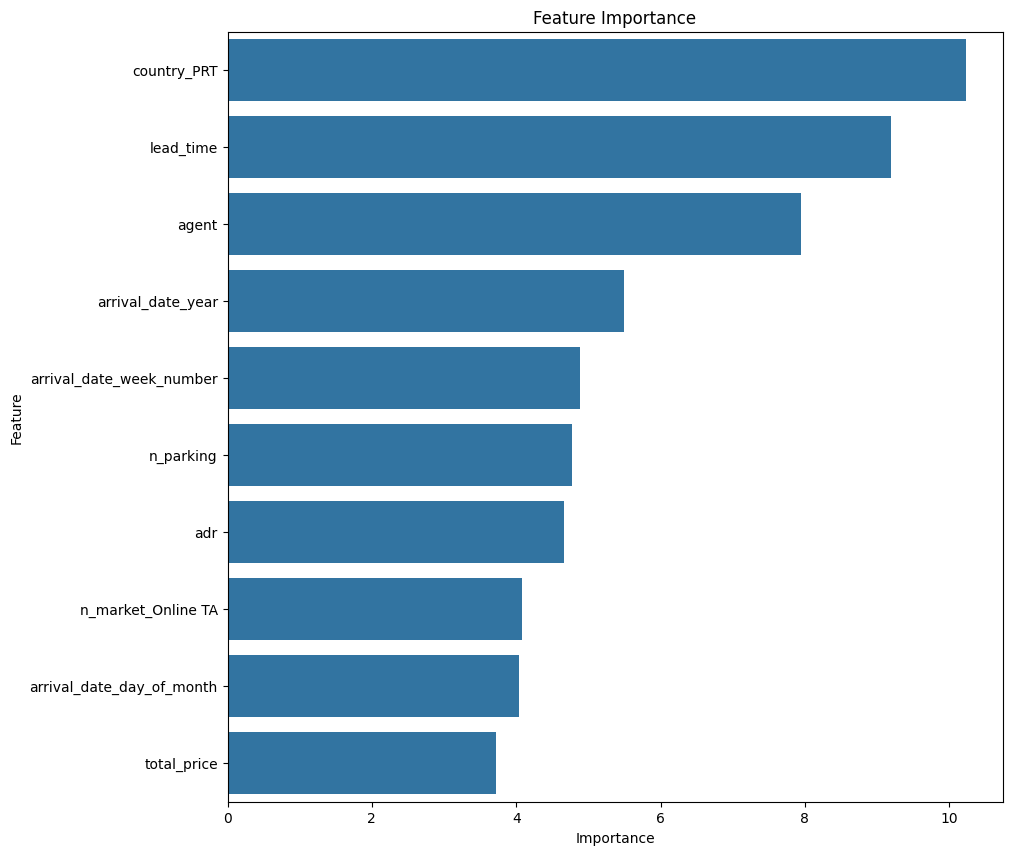

In [81]:
feat_imp = model_tuned.get_feature_importance()
feat_names = X.columns

imp = pd.DataFrame({'Feature': feat_names, 'Importance': feat_imp})
imp = imp.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(data=imp[:10], x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

## SHAP Analysis

In [82]:
import shap

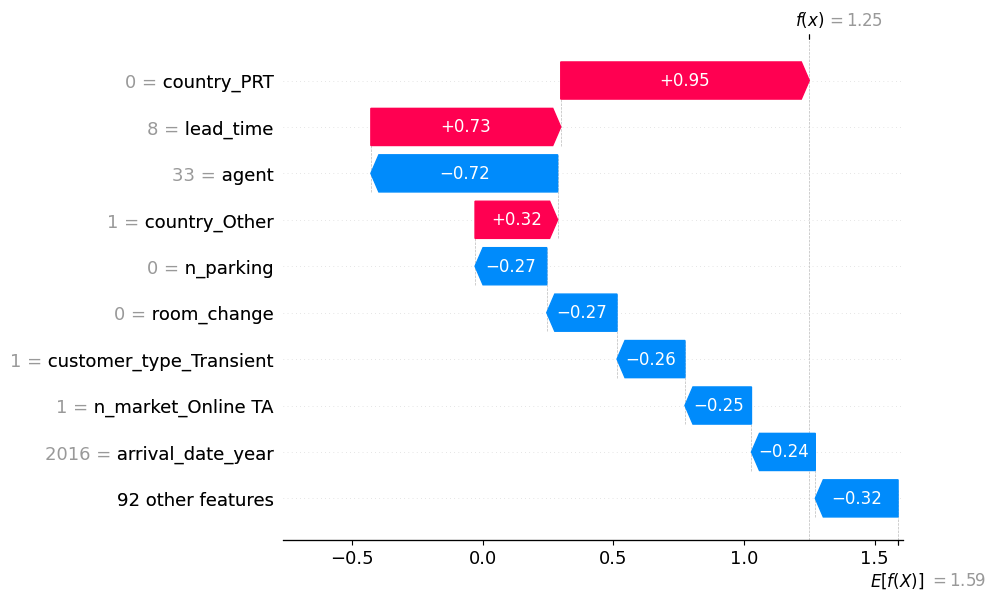

In [83]:
explainer = shap.Explainer(model_tuned)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

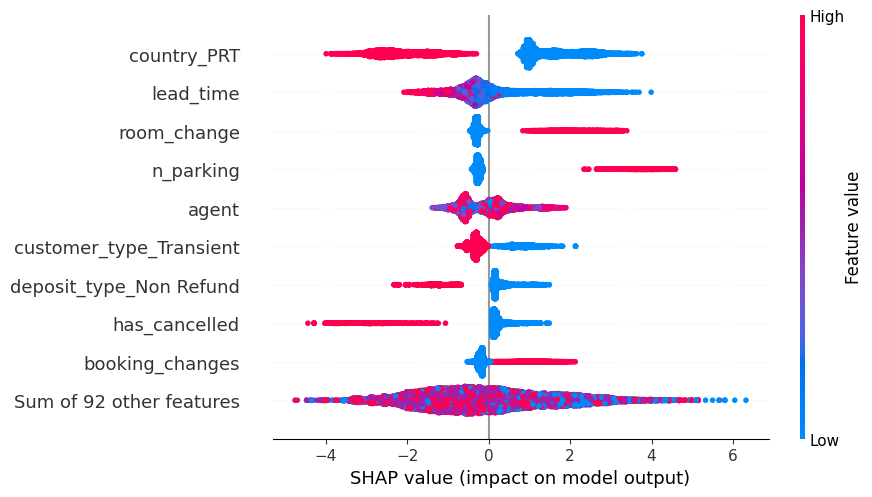

In [84]:
shap.plots.beeswarm(shap_values)

In [85]:
shap.initjs()
shap.plots.force(shap_values[0])

## Wrong Predictions Comparison

In [86]:
compare = X_test.copy()
compare['true'] = y
compare['preds'] = test_preds
wrong = compare[compare['true']!=compare['preds']]
wrong.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,...,n_channel_Corporate,n_channel_Direct,n_channel_Other,n_channel_TA/TO,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,true,preds
27716,52.0,2017.0,5.0,18.0,6.0,2.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
56713,89.0,2017.0,4.0,14.0,5.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
59245,6.0,2016.0,2.0,9.0,26.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
36482,157.0,2017.0,8.0,31.0,1.0,0.0,4.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
34063,190.0,2016.0,12.0,53.0,26.0,1.0,4.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0


In [87]:
wrong['preds'].value_counts()

preds
1    1092
0     853
Name: count, dtype: int64

In [91]:
actual_index = X_test.index.get_loc(34063)
print(actual_index)

34


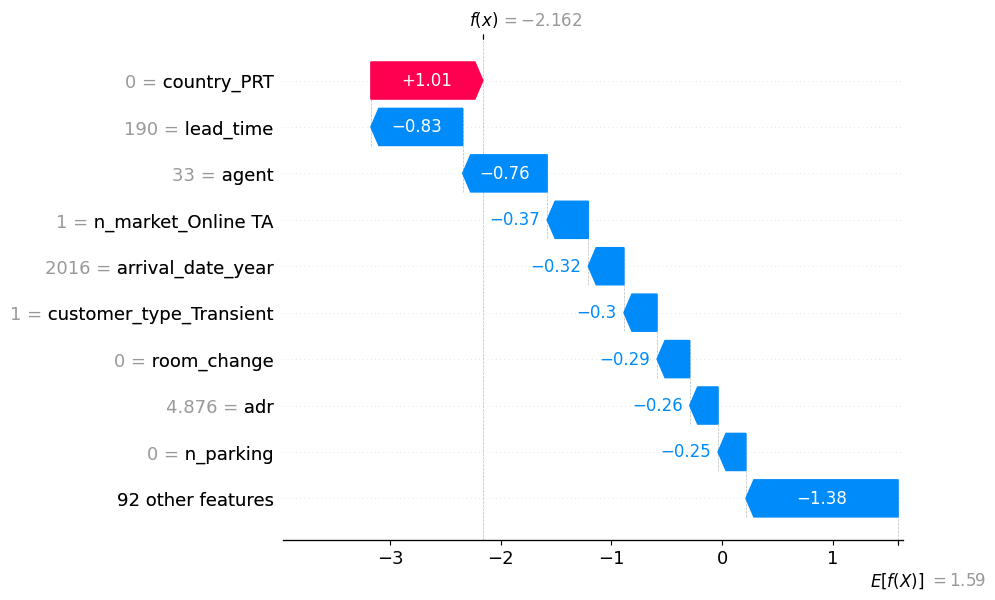

In [92]:
shap.plots.waterfall(shap_values[actual_index])

In [93]:
actual_index = X_test.index.get_loc(36482)
print(actual_index)

28


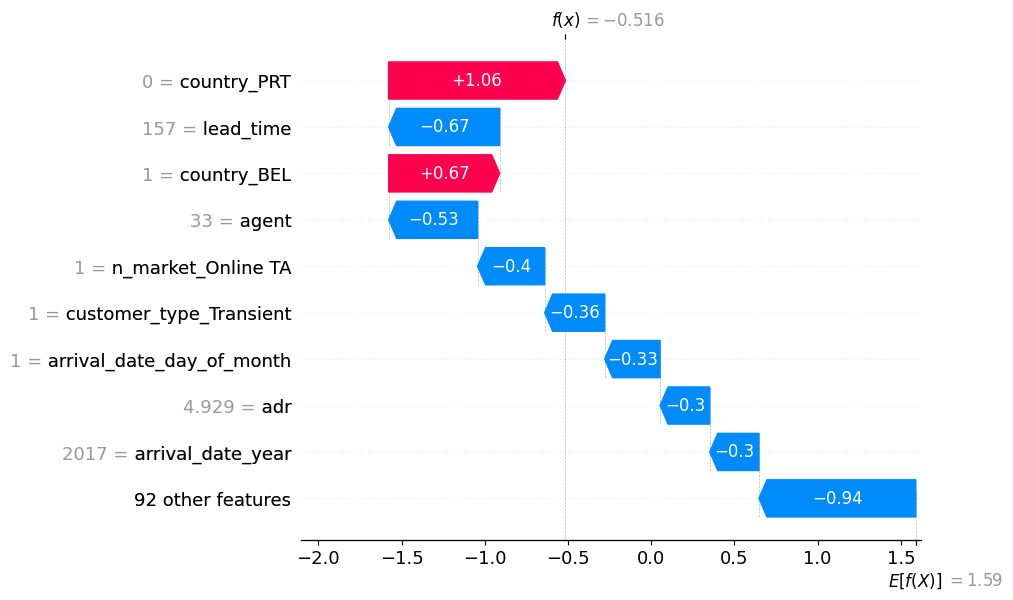

In [94]:
shap.plots.waterfall(shap_values[actual_index])

# Predict

In [106]:
model_tuned.fit(X,y)

In [96]:
test = df_test.copy()

In [97]:
test.isna().sum()

id                                    0
hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              1
babies                                0
meal                                  0
country                              69
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              2581
company                           17852


In [98]:
test[test['children'].isna()] = 0

In [99]:
test = pipeline(test)

In [100]:
test.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,...,n_market_Online TA,n_market_Other,n_channel_Corporate,n_channel_Direct,n_channel_Other,n_channel_TA/TO,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,490.0,2017.0,7.0,30.0,29.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,111.0,2016.0,12.0,52.0,24.0,2.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,34.0,2016.0,12.0,50.0,9.0,0.0,1.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,145.0,2016.0,10.0,43.0,22.0,1.0,1.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,166.0,2016.0,11.0,45.0,1.0,0.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [107]:
preds = model_tuned.predict(test)

In [108]:
preds[:50]

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1], dtype=int64)

In [109]:
fin = pd.DataFrame({'id': df_test.id, 'reservation_status': preds})
fin.to_csv('test_after2.csv',index=False)